# Bayesian Linear Regression

This notebook focuses on Bayesian linear regression and consists of two parts. 

In the first part of the notebook, the basics of Bayesian learning are visualized by applying it for a simple linear model and displaying the likelihood, prior, posterior and dataspace for several sequential draws. It shows that the posterior becomes more and more centered around the true values as more data is observed, resulting in a data space that resembles the true relation. A zero-mean isotropic conjugate Gaussian prior is used 

The second part of the notebook a Bayesian linear regression model is implemented to fit periodic data, also using a zero-mean isotropic Gaussian prior. Instead of visualizing the results of several sequential draws, one update is applied and the Bayesian predicitve distribution is visualized. It shows the predictive mean and standard deviation, to provide insight on how this depends on the observed data.

In [6]:
#Importing the needed libraries and figure settings
import numpy as np
from scipy.stats import multivariate_normal
import sys
import platform
from importlib.util import find_spec, module_from_spec
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]     # Figure size
np.random.seed(1234)

## 1. Sequential updating

The first part of notebook contains some exercises based on the Pattern recognition and Machine Learning book of Bishop (link below). It focusses on the basics of Bayesian learning, by replicating Figure 3.7. on page 155 of Bishop. Here, Bayesian learning for a simple linear model is applied and the likelihood, prior, posterior and dataspace of several sequential draws are visualized.

Book pdf link: [Bishop, Pattern recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)

As in the book, a zero-mean isotropic conjugate Gaussian prior is used, as given by equation (3.52). The two parameters are fixed: $\alpha=2$ and $\beta=25$


In [7]:
#Parameters used
alpha = 2
beta = 25

#Setting the prior mean and covariance
m_0 = np.array([0,0])   # prior mean
S_0 = 1/alpha*np.eye(2) # prior covariance

A function <span style="color:blue">lr_predict()</span> is coded, that calculates the predicted values for a simple linear regression with a single explanatory variable, but for  a set of different weights.

In [8]:
def lr_predict(W,x):
    """
    Purpose:
        Calculate predicted values for a simple regression given a set of different weights
    Inputs:
        W     (k,2) matrix, weights
        x     (n,) vector, explanatory variables
    Output:
        y     (n,k) matrix, predicted values for all sets of weights
    """
    
    N = len(x)
    Phi = np.column_stack((np.ones(N), x))    # add constant to regressor matrix
    y = Phi @ W.T       
    return y

Make six draws from the prior distribution and predict based on these draws for the whole range of x. This provides the data space plot information. With this, the first plots can be created: the **prior** and the initial **data space**.

In [9]:
w_draw = multivariate_normal.rvs(m_0, S_0, size=6)
x = np.linspace(-1, 1, 100)
y_draw = lr_predict(w_draw,x)

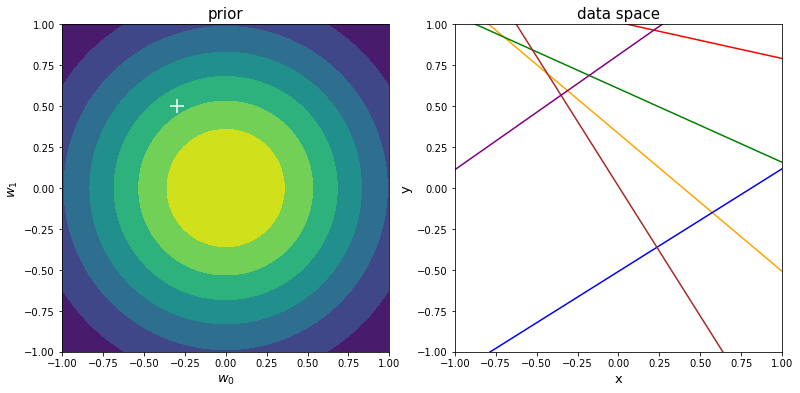

In [10]:
# Plot the first row figures
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

c = ["orange", "red", "blue", "green", "brown", "purple"]

#Plotting the prior distribution
plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=200, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, multivariate_normal.pdf(w, m_0, S_0),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$", fontsize = 13)
plt.title("prior", fontsize = 15)

#Plotting the data space
plt.subplot(1, 2, 2)
for i in range(6):
    plt.plot(x,y_draw[:,i], c[i])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.title("data space", fontsize = 15)
plt.subplots_adjust(left=3, bottom=None, right=4, top=None, wspace=None, hspace=None)
plt.show()

A <span style="color:blue">Posterior()</span> function is coded that calculated the parameters of the posterior distribution given the Gaussian prior. This is based on formulas (3.49) - (3.51).

In [11]:
def Posterior(Phi, t, m_prior, S_prior, beta):
    """
    Purpose:
        Calculate the parameters of the posterior distribution given Gaussian prior and precision beta
    Inputs:
        Phi     (n,k) matrix, design matrix
        t       (n,) vector, target variable
        m_prior (k,) vector, prior mean
        S_prior (k,k) matrix, prior covariance
        beta    double, precision parameter of noise
    Output:
        m_post  (k,) vector, posterior mean
        S_post  (k,k) matrix, posterior variance
    """
    n,k = np.shape(Phi)
    
    S_N_inv = np.linalg.inv(S_prior) + beta*Phi.T@Phi
    m_post = np.linalg.inv(S_N_inv)@(np.linalg.inv(S_prior)@m_prior + beta*Phi.T@t)
    S_post = np.linalg.inv(S_N_inv)
    
    return m_post, S_post

A single data point (0.9, 0) is observed, that is $x_1=0.9$ and $t_1=0$. With this, the prior is updated to obtain the posterior distribution, which is plotted against w0 and w1 to visualize the posterior. Additionally, 6 draws from the posterior are used to visualize the next data space.

The likelihood of the data point will be visualized later on in the notebook.

In [12]:
#The observed data point
x1 = 0.9
t1 = 0

#Calculating the posterior
Phi1 = np.array([[1,x1]])
t1 = np.array([t1])
m_post1, S_post1 = Posterior(Phi1,t1,m_0,S_0,beta)

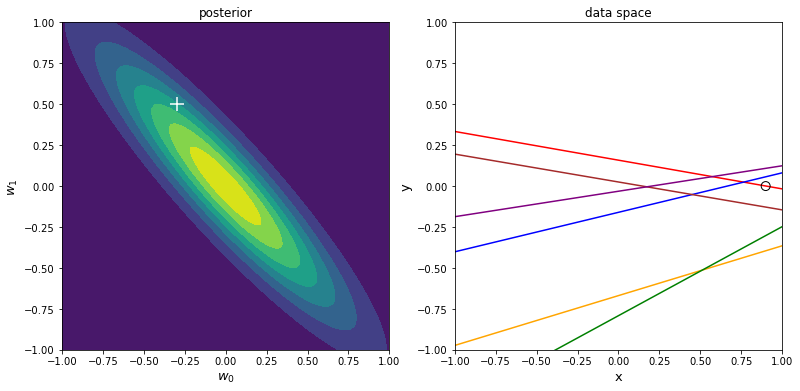

In [13]:
#Plotting the posterior and data space
w_draw1 = multivariate_normal.rvs(m_post1, S_post1, size=6)
y_draw1 = lr_predict(w_draw1,x)

#Posterior
plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=200, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, multivariate_normal.pdf(w, m_post1, S_post1),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$", fontsize = 13)
plt.title("posterior")

#Data space
plt.subplot(1, 2, 2)
plt.scatter(0.9, 0, s=80, facecolors='none', edgecolors='black',zorder=7)
for i in range(6):
    plt.plot(x,y_draw1[:,i], c[i])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.title("data space")
plt.subplots_adjust(left=3, bottom=None, right=4, top=None, wspace=None, hspace=None)
plt.show()

Next, another data point comes out: (-0.75, -0.5). The posterior is updated accordingly. Meaning that the previous posterior now becomes the prior and the new data point is used to calculate the  posterior. The posterior distribution agains w0 and w1, and 6 draws from the posterior in the data space are again visualized.

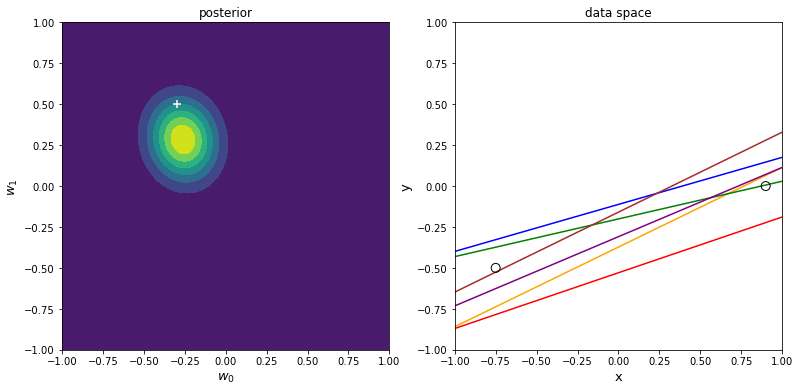

In [14]:
#The new datapoint
x2 = -0.75
t2 = -0.5

#Calculating  the posterior distribution
Phi2 = np.array([[1,x2]])
t2 = np.array([t2])
m_post2, S_post2=Posterior(Phi2,t2,m_post1,S_post1,beta)

#Plotting the posterior distribution
w_draw2 = multivariate_normal.rvs(m_post2, S_post2, size=6)
y_draw2 = lr_predict(w_draw2,x)

plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=50, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, multivariate_normal.pdf(w, m_post2, S_post2),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$", fontsize =13)
plt.title("posterior")

#Visualizing the data space
plt.subplot(1, 2, 2)
for i in range(6):
    plt.plot(x,y_draw2[:,i], c[i])
plt.scatter(-0.75, -0.5, s=80,facecolors='none', edgecolors='black',zorder=7)
plt.scatter(0.9, 0, s=80, facecolors='none', edgecolors='black',zorder=8)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.title("data space")
plt.subplots_adjust(left=3, bottom=None, right=4, top=None, wspace=None, hspace=None)
plt.show()

We now look at the likelihood functions. First, the log likelihood function of the linear model is coded. Next, the likelihood values against w0 and w1 of the first data point alone and then for the second data point alone are visualized. This results in the first two figures of the left column of figure (3.7). 

Additionally, the likelihood function for the two data points is plotted. This figure is the same as the posterior distribution that was plotted before. The reason for this is as follows: The posterior is obtained by multiplying the prior with the likelihood. The combined likelihood is obtained by multiplying the likelihoods. Since one likelihood is used in both the combined likelihood and the posterior and the prior is equal to the other likelihood, the results are the same.

In [15]:
#The log likelihood function
def loglike(Phi, t, w, beta):
    """
    Purpose:
        Calculate the loglikelihood value of the linear model
    Inputs:
        Phi    (n,k) matrix, design matrix
        t      (n,) vector, target variable
        w      (k,) vector, weights
        beta   double, noise's precision parameter
    Output:
        loglike  double, loglikelihod value
    """
    n = np.size(t)    
    loglike = (n/2)*np.log(beta)-(n/2)*np.log(2*np.pi)-beta/2 * np.sum((t - Phi@w)**2)
       
    return loglike

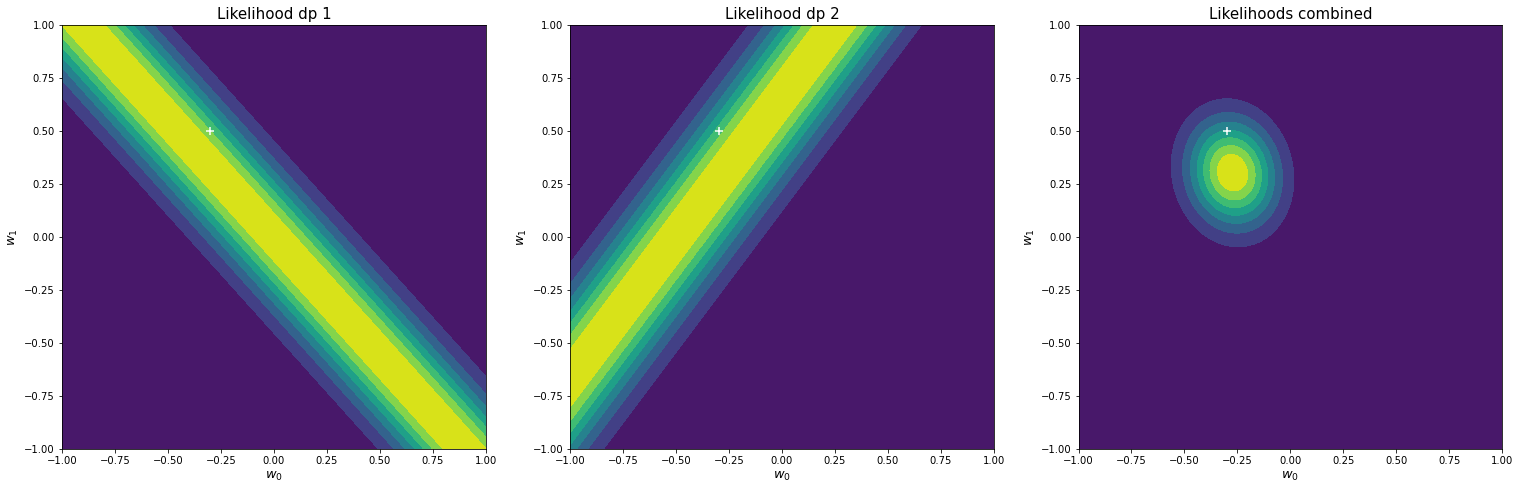

In [16]:
#Calculating the log likelihoods
loglik1 = np.reshape([loglike(Phi1, t1, w[i,j,:], beta) for i in range(w.shape[0]) for j in range(w.shape[1])],(100,100))
loglik2 = np.reshape([loglike(Phi2, t2, w[i,j,:], beta) for i in range(w.shape[0]) for j in range(w.shape[1])],(100,100))
loglik3 = np.reshape([loglike(np.concatenate((Phi1, Phi2)), np.append(t1, t2), w[i,j,:], beta) for i in range(w.shape[0]) for j in range(w.shape[1])],(100,100))

#Creating the plots, in which the exponential of the log likelihood is used to obtain the likelihood
plt.subplot(1, 3, 1)
plt.scatter(-0.3, 0.5, s=50, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, np.exp(loglik1),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$", fontsize = 13)
plt.title("Likelihood dp 1", fontsize = 15)

plt.subplot(1, 3, 2)
plt.scatter(-0.3, 0.5, s=50, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, np.exp(loglik2),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$", fontsize = 13)
plt.title("Likelihood dp 2", fontsize = 15)

plt.subplot(1, 3, 3)
plt.scatter(-0.3, 0.5, s=50, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, np.exp(loglik3),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$",fontsize = 13)
plt.title("Likelihoods combined", fontsize = 15)

plt.subplots_adjust(left=5, bottom=None, right=7, top=None, wspace=None, hspace=None)
plt.show()

Next, 18 data points are observed that are drawn form the dgp:
$$t = -0.3 + 0.5\cdot x + \varepsilon$$

The posterior is again updated, now with 18 additional data points. This is done jointly and not sequentially. The result is again visualized, as well as 6 draws from the posterior in the data space based on the 20 observations obtained so far.

In [17]:
# simulate 18 data points
x_sim = np.random.uniform(-1,1,18)
e = np.random.normal(0,np.sqrt(1/beta),18)
t = -0.3+0.5*x_sim+e

#Update the posterior
Phi = np.column_stack((np.ones(18), x_sim))
t3 = np.append(np.append(t1, t2),t)
Phi3 = np.vstack((np.concatenate((Phi1, Phi2)), Phi))
m_post3, S_post3 = Posterior(Phi3,t3,m_post2,S_post2,beta)

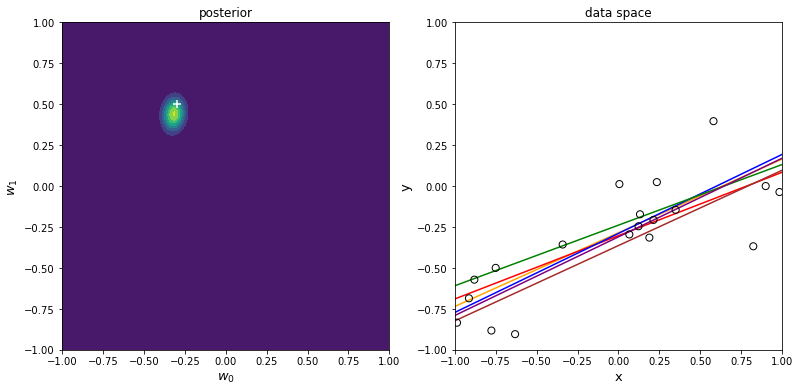

In [18]:
#Plotting the figures
w_draw3 = multivariate_normal.rvs(m_post3, S_post3, size=6)
y_draw3 = lr_predict(w_draw3,x)

plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=50, marker="+",c="white",zorder=2)
plt.contourf(w0, w1, multivariate_normal.pdf(w, m_post3, S_post3),zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$", fontsize = 13)
plt.ylabel("$w_1$", fontsize = 13)
plt.title("posterior")
plt.subplot(1, 2, 2)
for i in range(6):
    plt.plot(x,y_draw3[:,i], c[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(Phi3[:,1], t3, s=50,facecolors='none', edgecolors='black',zorder=7)
plt.xlabel('x', fontsize = 13)
plt.ylabel('y', fontsize = 13)
plt.title("data space")
plt.subplots_adjust(left=3, bottom=None, right=4, top=None, wspace=None, hspace=None)
plt.show()


The steps above provide a visualization of the Bayesian learning process for an alpha that is fixed at 2. To see the effect of the value of alpha on this process, its value can be increased. By increasing alpha to 20, the prior distribution becomes more centered, since alpha is the precision of the prior distribution. This means that you need more than 20 datapoints to center the posterior distribution around the true values. When using 20 datapoints, the plot is similar for alpha=2 and alpha =20. But when increasing alpha even more, for example alpha = 200, the posterior plot in question 6 is also further away from the true value. This shows that increasing alpha slows down the Bayesian Sequential Learning Process.

## 2 Perdictive distribution

### Sine 2 

First a function to generate periodic data is created. 

The method has a parameter $N$ and returns $N$-dimensional vectors $x$ and $t$, where the $x$ values drawn from a uniform distribution between $0$ and $2 \pi$ and the elements $t_i$ of $t$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $f{x}$, the mean $\mu_i = \sin(x_i)$ and the standard deviation $\sigma = 0.25$.

In this notebook a Bayesian linear regression model is implementend and fit to the periodic data. The regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(w \;|\; \alpha) = \mathcal{N}(w \;|\; 0, \alpha^{-1} I)$$

The covariance and mean of the posterior are given by:

$$S_N= \left( \alpha I + \beta Phi^T Phi \right)^{-1} $$
$$m_N = \beta\; S_N Phi^T t$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 


In [19]:
def gen_sine2(n):    
    x = np.random.uniform(0, 2*pi, n)
    t = np.random.normal(np.sin(x), 0.25)
    return x, t


### Compute Posterior

The method `fit_polynomial_bayes(x, t, M, alpha, beta)` is created, that returns the mean $m_N$ and covariance $S_N$ of the posterior for a $M$-th order polynomial. 

In [20]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    Phi = np.array([x**i for i in range(M+1)]).T
    S = np.linalg.inv(alpha*np.identity(M+1) + beta*Phi.T@Phi)
    m = beta*S@Phi.T@t    
    return m, S, Phi


### Prediction

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; x, t, \alpha, \beta) = \mathcal{N}(t \;|\; m_N^T \phi(x), \sigma_N^2(x))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(x)^T S_N \phi(x) $$

where $\phi(x)$ are the computed features for a new datapoint $x$, and $t$ is the predicted variable for datapoint $x$. 

Using this, the function `predict_polynomial_bayes(x, m, S, beta)` is created, that returns the predictive mean, variance and design matrix $Phi$ given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [21]:
def predict_polynomial_bayes(x, m, S, beta):
    comp_feat = np.array([x**i for i in range(M+1)])
    Phi = comp_feat.T
    mean = m.T@comp_feat   
    sigma = (1/beta + comp_feat.T@S@comp_feat).diagonal() 
    return mean, sigma, Phi


### Plot predictive distribution

The above created function are implemented on 10 datapoints generated with `gen_sine2(10)`. The posterior mean and covariance for a Bayesian polynomial regression model with $M=4$, $\alpha=\frac{2}{5}$ and $\beta=\frac{1}{0.25^2}$ are computed.

To visualize the result, the Bayesion predictive distribution is plotted, where (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and the predictive standard deviation are shown. The datapoints are also included.

The figure shows that the predictive mean seems to fit the data well. Additionally, it shows that the standard deviation is larger when there are no observed data points close by.

Text(0.5, 1.0, 'Bayesian Predictive Distribution')

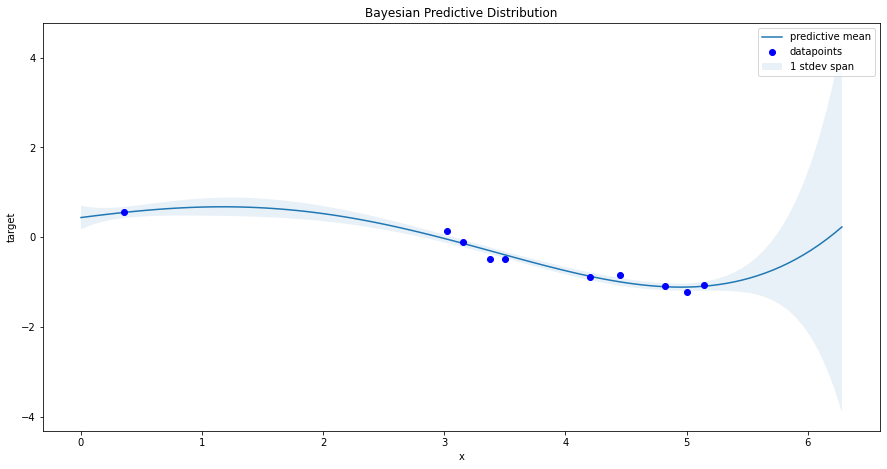

In [22]:
M = 4
alpha = 2/5
beta = 1/(0.25**2)

x, t = gen_sine2(10)
m, S, Phi = fit_polynomial_bayes(x, t, M, alpha, beta)

X = np.linspace(0, 2*pi, 100)
mean, sigma, Phi = predict_polynomial_bayes(X, m, S, beta)

plt.figure(figsize=[15,7.5], edgecolor='black')
plt.plot(X, mean, label='predictive mean')
plt.fill_between(X, mean+sigma, mean-sigma, alpha=0.1, label='1 stdev span')
plt.plot(x, t, 'bo', label='datapoints')
plt.legend()
plt.xlabel('x')
plt.ylabel('target')
plt.title('Bayesian Predictive Distribution')
